## Final Project Submission

* Student(s) name: Thenya Thuita
* Student(s) pace: Part Time-04B 
* Scheduled project review date/time: 30th October - 4th November 2023
* Instructor name: Faith Rotich

# 1. BUSINESS UNDERSTANDING

### Problem Statement

Syriatel Telecommunications company is a Syria Based tele-company that is facing a problem of losing customers, this action is known as churning.The company is conscerned by this and would like to know if the rate of churning would increase on the future.Not only does this project help them know that but also know how to better their relationship with their users to maintain a high rate of retention and even a high attraction of new clients.

### Objectives

 1. Find out why customers are churning.
 2. Develop a model that will accurately predict future rate of churning.
 3. Find a probable solution to reduce churning.

### Success Metric

1. Develop a roburts prediciton model with a recall score of  0.7 - .80
2. Be able to identify features that significantly contribute to churning.
3. Provide possible solutions to the telecom company that will help reduce churning.

# 2. DATA UNDERSTANDING

Here's a summary of the columns:

* `state`: The state of the customer.
* `account length`: The length of the account in days or months.
* `area code`: The area code of the customer's phone number.
* `phone number`: The phone number of the customer.
* `international plan`: Whether the customer has an international plan or not.
* `voice mail plan`: Whether the customer has a voicemail plan or not.
* `number vmail messages`: The number of voicemail messages the customer has.
* `total day minutes`: Total minutes of day calls.
* `total day calls`: Total number of day calls.
* `total day charge`: Total charge for the day calls.
* `total eve minutes`: Total minutes of evening calls.
* `total eve calls`: Total number of evening calls.
* `total eve charge`: Total charge for the evening calls.
* `total night minutes`: Total minutes of night calls.
* `total night calls`: Total number of night calls.
* `total night charge`: Total charge for the night calls.
* `total intl minutes`: Total minutes of international calls.
* `total intl calls`: Total number of international calls.
* `total intl charge`: Total charge for the international calls.
* `customer service calls`: Number of times the customer called customer service.
* `churn`: Whether the customer churned or not (True/False).

In [1]:
# Importing necessary modules and packages

#for data analysis and manipulation
import pandas as pd
import numpy as np

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visualization style
sns.set_style("darkgrid")

# Display plots in the notebook
%matplotlib inline

#Modelling and supervised learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, SMOTENC

#Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Filter warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading data
data = pd.read_csv("telecom.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#General stats of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From the above result we can see we have one Boolean column = churning, four object data type column = state, international plan, voice mail plan and phone number and the rest as interger types of data either int64 or float64

In [4]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# 3. DATA PREPARATION

### 3.1  Data preprocessing

In [5]:
# finding duplicates and missing values
duplicated = data.duplicated().sum()

missing_values = data.isna().sum()

#Display the total number of duplicate values and missing_values
print("Duplicated values are:", duplicated)
print("Missing values are:\n", missing_values)

Duplicated values are: 0
Missing values are:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [6]:
# Converting string-based categorical values to integer-based categorical representations
intl_plan = {'yes': 1, 'no': 0}
vm_plan = {'yes': 1, 'no': 0}
churn_status = {True: 1, False: 0}

#Display the replacement of each column
data['international plan'].replace(intl_plan, inplace=True)
data['voice mail plan'].replace(vm_plan, inplace=True)
data['churn'].replace(churn_status, inplace=True)


In [7]:

data.sample(15)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1382,GA,125,415,380-6342,0,1,39,236.1,107,40.14,...,110,24.58,175.4,107,7.89,9.1,4,2.46,2,0
619,KS,110,415,383-1657,1,0,0,293.3,79,49.86,...,90,16.02,266.9,91,12.01,14.5,4,3.92,0,1
119,ID,97,408,328-3266,0,0,0,239.8,125,40.77,...,111,18.26,143.3,81,6.45,8.7,5,2.35,2,0
188,WY,164,510,373-4819,0,0,0,160.6,111,27.30,...,126,13.87,187.1,112,8.42,9.0,3,2.43,1,0
1984,TN,112,415,339-6477,0,0,0,272.5,119,46.33,...,94,19.22,159.1,94,7.16,16.4,5,4.43,3,1
2453,HI,134,415,342-9394,0,1,38,214.4,93,36.45,...,57,17.99,165.0,79,7.43,10.0,8,2.70,1,0
1623,ME,130,408,387-6031,0,0,0,176.3,140,29.97,...,104,17.09,161.9,123,7.29,11.3,5,3.05,1,0
1134,TN,105,408,353-8849,0,0,0,206.2,84,35.05,...,138,21.79,117.1,91,5.27,9.0,3,2.43,1,0
3190,ID,103,415,346-5992,0,0,0,174.7,151,29.70,...,56,12.58,168.2,109,7.57,15.8,3,4.27,6,1
210,LA,99,415,411-2284,0,0,0,241.1,72,40.99,...,98,13.23,188.2,109,8.47,11.6,10,3.13,1,0


In [8]:
#totals for minutes, charges and calls

data['total_charges'] = round(data['total day charge'] + data['total eve charge'] + data['total night charge'] + data['total intl charge'])
data['total_calls'] = round(data['total day calls'] + data['total eve calls'] + data['total night calls'] + data['total intl calls'])
data['total_minutes'] = round(data['total day minutes'] + data['total eve minutes'] + data['total night minutes'] + data['total intl minutes'])


In [9]:
print(data[['total_charges', 'total_calls','total_minutes']].sample(10))

      total_charges  total_calls  total_minutes
189            68.0          314          660.0
497            66.0          289          657.0
2319           78.0          317          715.0
2303           32.0          275          399.0
1471           61.0          291          619.0
643            74.0          307          734.0
1320           59.0          345          545.0
221            57.0          291          596.0
3112           49.0          262          492.0
3272           83.0          355          761.0


In [10]:
#Display 10 random entries to confirm changes
data.sample(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_charges,total_calls,total_minutes
1881,NE,76,415,334-6519,0,0,0,272.7,97,46.36,...,105,10.60,7.7,2,2.08,0,1,79.0,299,752.0
895,MD,106,415,343-2350,0,0,0,165.3,118,28.10,...,93,8.42,8.5,3,2.30,2,0,57.0,315,571.0
2244,KS,148,510,415-4051,0,0,0,239.3,84,40.68,...,104,10.47,10.9,3,2.94,1,0,71.0,276,678.0
3207,DC,93,408,345-1994,0,1,22,306.2,123,52.05,...,107,10.81,11.7,2,3.16,0,0,82.0,315,748.0
1471,OH,75,415,340-9803,0,0,0,150.6,99,25.60,...,104,7.14,8.1,5,2.19,0,0,61.0,291,619.0
1503,WV,57,415,419-6418,1,1,17,236.5,94,40.21,...,117,10.65,12.2,3,3.29,2,0,68.0,308,648.0
439,MI,81,415,408-3384,0,0,0,153.5,99,26.10,...,86,8.93,6.3,2,1.70,2,0,54.0,289,556.0
2598,TN,196,415,340-8291,0,0,0,133.1,80,22.63,...,96,9.97,10.3,8,2.78,1,0,53.0,304,572.0
1441,NC,172,408,331-5962,0,1,47,274.9,102,46.73,...,123,11.03,8.8,2,2.38,1,0,76.0,345,715.0
1146,WA,161,415,378-8137,0,0,0,151.6,117,25.77,...,68,10.11,4.0,5,1.08,1,0,56.0,277,600.0


#### 3.2 Create a copy of data

In [11]:
import pandas as pd

# Assuming 'data' is your DataFrame
data_copy = data.copy()

# Specify the columns to drop
columns_to_drop = ['phone number','total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls','total day charge', 'total eve charge', 'total night charge', 'total intl charge']

# Use the drop method with the 'columns' parameter
data_copy = data_copy.drop(columns=columns_to_drop)

# Print a sample of the modified DataFrame
data_copy.sample(10)


,state,account length,area code,international plan,voice mail plan,number vmail messages,customer service calls,churn,total_charges,total_calls,total_minutes
2028,SD,93,510,0,0,0,1,1,85.0,312,792.0
1435,IL,89,415,1,1,19,0,1,50.0,364,509.0
2863,ME,28,415,0,0,0,3,0,70.0,307,694.0
900,VA,72,510,1,1,29,0,0,47.0,299,504.0
2163,KS,119,415,0,0,0,1,0,74.0,307,717.0
569,NC,133,408,1,1,32,2,1,72.0,348,670.0
475,AR,74,510,0,0,0,3,0,53.0,242,594.0
171,NH,64,408,0,1,27,2,0,56.0,280,527.0
3161,NV,148,510,0,0,0,2,0,69.0,348,712.0
1342,AK,52,415,0,1,24,2,0,54.0,280,535.0


#### 3.3 Univariate Analysis

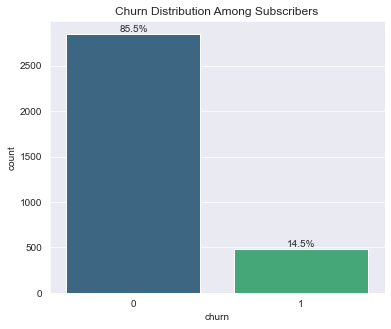

In [12]:
# Churn distribution among subscribers
#Setting size figure
plt.figure(figsize=(6, 5))
#Creating a countplot using seaborn
ax = sns.countplot(x='churn', data=data, palette='viridis')
#Calc the total number of data points
total = len(data['churn'])

#Adding percentage annotation for each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

#Set title for plot
plt.title("Churn Distribution Among Subscribers")
plt.show()

In [44]:
# Pie chart of area code feature
area = data['area code'].value_counts()
transanction = area.index
quantity = area.values

# plot pie circle with plotly
figure = px.pie(data,
               values = quantity,
               names = transanction,
               hole = .5,
               title = 'Distribution of Area Code Feature')
figure.show()

#### 3.4 Bivariate analysis

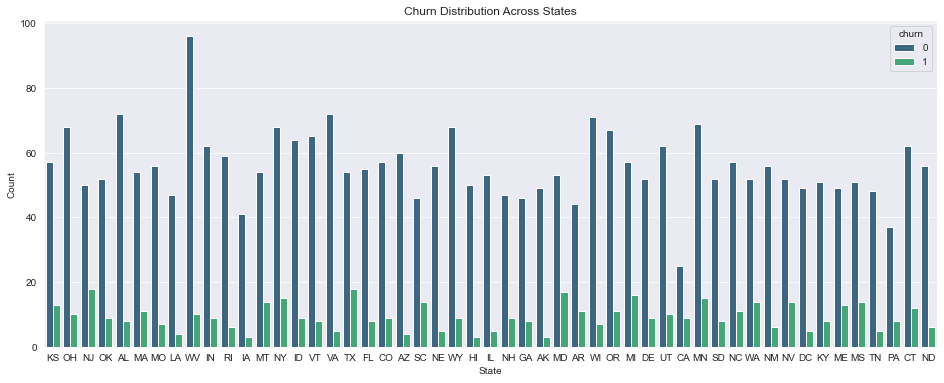

In [13]:
# Churn vs States

# Set figure size
plt.figure(figsize=(16, 6))

# Create a bar plot
sns.countplot(x='state', hue='churn', data=data_copy, palette='viridis')

# Add titles and labels
plt.title('Churn Distribution Across States')
plt.xlabel('State')
plt.ylabel('Count')

# Show the plot
plt.show()


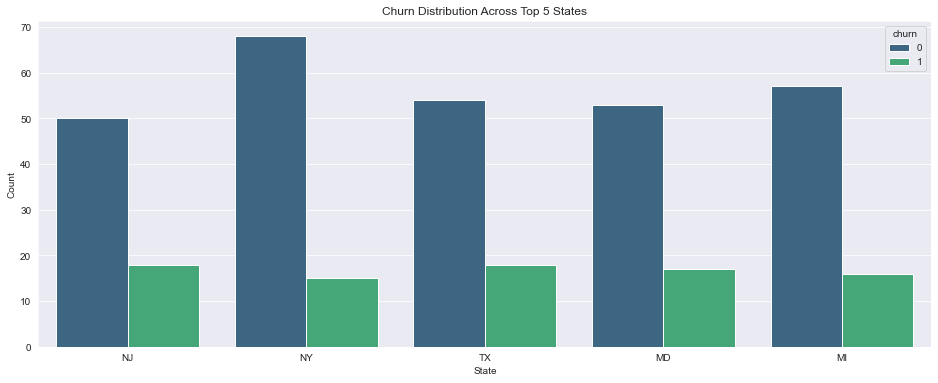

In [46]:
# Calculate the total number of churns for each state
state_churn_counts = data.groupby('state')['churn'].sum()

# Find the top 5 states with the highest churn counts
top_5_states = state_churn_counts.sort_values(ascending=False).head(5).index

# Set figure size
plt.figure(figsize=(16, 6))

# Create a bar plot for the top 5 states
sns.countplot(x='state', hue='churn', data=data[data['state'].isin(top_5_states)], palette='viridis')

# Add titles and labels
plt.title('Churn Distribution Across Top 5 States')
plt.xlabel('State')
plt.ylabel('Count')

# Show the plot
plt.show()


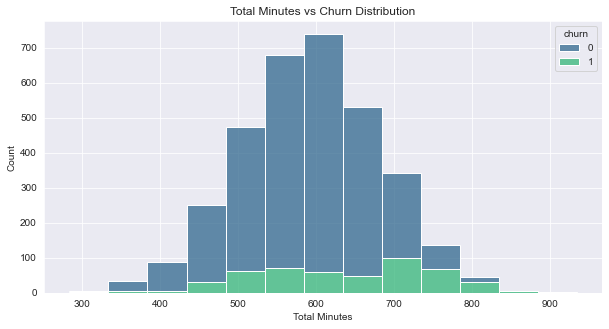

In [14]:
# Create a figure and axis
plt.figure(figsize=(10, 5))

# Plot the stacked bar plot
sns.histplot(data=data_copy, x='total_minutes', hue='churn', multiple='stack', binwidth=50, palette='viridis')

# Add labels and title
plt.xlabel('Total Minutes')
plt.ylabel('Count')
plt.title('Total Minutes vs Churn Distribution')

# Show the plot
plt.show()


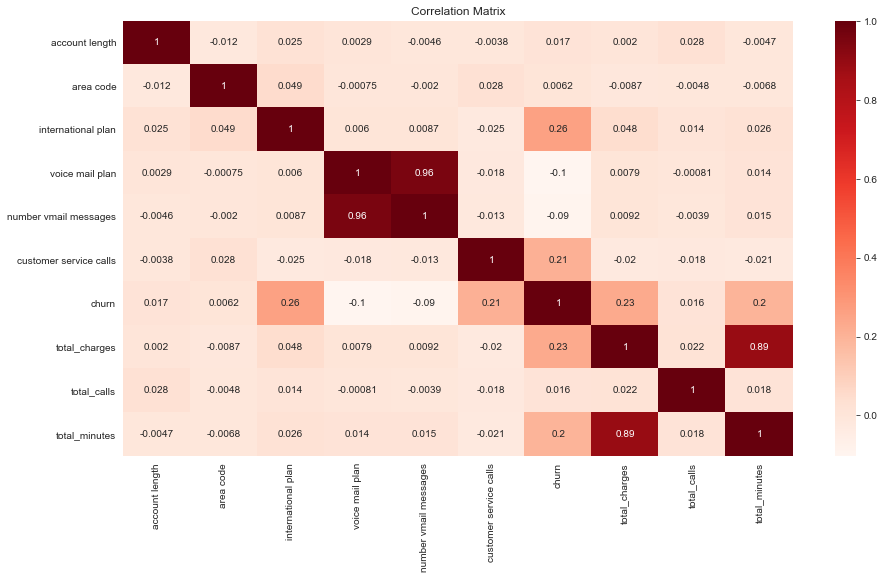

In [15]:
#Calculate the correlation matrix using the corr() method
correlation_matrix = data_copy.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

Multicollinearity occurs when two or more features in the dataset are highly correlated with each other, which can cause issues during modeling such as instability, overfitting, or inaccurate coefficient estimates.

# 4. MODELLING

In [16]:
#Onehote encoding for our categorcial features
data_copy = pd.get_dummies(data_copy, columns=['state', 'area code'], drop_first=True)


In [17]:
#Display 10 samples
data_copy.sample(10)

,account length,international plan,voice mail plan,number vmail messages,customer service calls,churn,total_charges,total_calls,total_minutes,state_AL,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
362,39,0,1,36,1,0,57.0,370,608.0,0,...,0,0,0,0,0,0,0,0,1,0
2611,135,0,0,0,0,0,54.0,282,529.0,0,...,0,0,0,0,0,0,0,0,0,1
3068,78,0,1,21,2,0,54.0,257,517.0,0,...,0,0,0,0,0,0,0,0,1,0
2934,24,0,0,0,2,1,50.0,226,527.0,0,...,0,0,0,0,0,0,0,0,0,0
2198,127,0,0,0,0,0,65.0,348,548.0,0,...,0,0,0,0,0,0,0,0,1,0
2214,90,0,0,0,1,0,64.0,355,625.0,0,...,0,0,0,0,0,0,0,0,1,0
82,55,0,1,25,3,0,51.0,310,488.0,0,...,0,0,0,0,0,0,0,0,0,0
3046,110,0,0,0,1,0,34.0,251,402.0,0,...,0,0,0,0,0,0,0,0,0,1
2587,105,0,0,0,3,0,66.0,362,641.0,0,...,0,0,0,0,0,0,0,0,0,1
3094,91,0,0,0,1,0,48.0,251,493.0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
#Scale the transform the data to avoid any interference from outliers
scaler = MinMaxScaler()

#iterate over the numerical columns in the data_copy set a scale of -1 to 1
def scaling(columns):
    return scaler.fit_transform(data_copy[columns].values.reshape(-1,1))
for i in data_copy.select_dtypes(include=[np.number]).columns:
    data_copy[i] = scaling(i)
# Display 10 samples
data_copy.sample(10)

,account length,international plan,voice mail plan,number vmail messages,customer service calls,churn,total_charges,total_calls,total_minutes,state_AL,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
2742,0.595041,0.0,1.0,0.607843,0.222222,0.0,0.630137,0.604444,0.668885,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
281,0.330579,0.0,0.0,0.000000,0.222222,0.0,0.547945,0.386667,0.547421,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1508,0.380165,0.0,0.0,0.000000,0.333333,0.0,0.534247,0.426667,0.668885,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2658,0.413223,0.0,0.0,0.000000,0.000000,0.0,0.616438,0.551111,0.465890,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2112,0.615702,0.0,0.0,0.000000,0.444444,1.0,0.397260,0.364444,0.391015,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2323,0.123967,0.0,0.0,0.000000,0.111111,0.0,0.465753,0.293333,0.490849,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2739,0.413223,0.0,1.0,0.176471,0.000000,0.0,0.424658,0.533333,0.392679,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2636,0.425620,0.0,0.0,0.000000,0.222222,0.0,0.452055,0.262222,0.462562,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1460,0.326446,0.0,0.0,0.000000,0.333333,0.0,0.479452,0.600000,0.435940,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
115,0.144628,1.0,1.0,0.823529,0.000000,1.0,0.602740,0.675556,0.542429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### 4.1 train test split

In [19]:
#Defining X(independent variables) and y(target variable)
X = data_copy.drop("churn", axis=1)
y = data_copy["churn"]

In [20]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

#### 4.2 SMOTE/SMOTENC technique

In [21]:
#SMOTE to fix the class imbalancemnt found during the decison tree classification

#instantiate SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

#### 4.3 Logistic Regression

In [22]:
#logistic regression
logreg =LogisticRegression(random_state=42)

In [23]:
#fit the model
logreg.fit(resampled_X_train, resampled_y_train)
#predict on the labels
y_pred_log = logreg.predict(X_test)

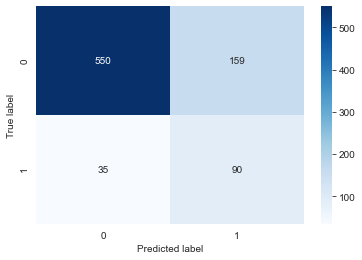

In [24]:
def plot_confusion_matrix(y_true, y_pred, classes):
    #plots confusion matrix

    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [25]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

         0.0       0.94      0.78      0.85       709
         1.0       0.36      0.72      0.48       125

    accuracy                           0.77       834
   macro avg       0.65      0.75      0.67       834
weighted avg       0.85      0.77      0.79       834



The classification report of the logistic regression model in summary:
- The recall score was .78(78%),means it was only able to identify 78% 'No Churn' correctly and .72(72%) for 'Churn instances
- Had an ccuracy of 77% which is not enough so hence we try another type of model.

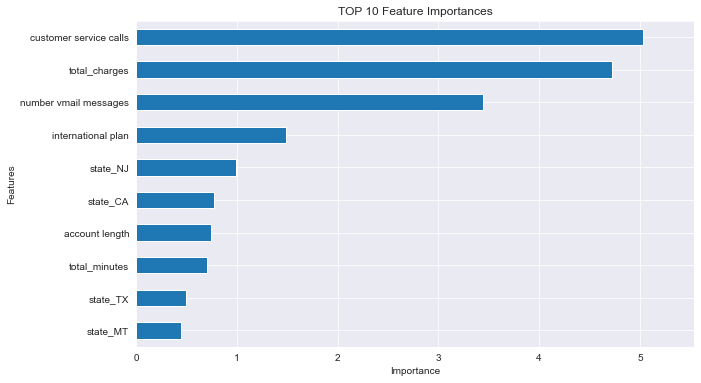

In [26]:
#Feature Importance in the logistics Regression

importance_logreg = logreg.coef_[0]
Feature_names = resampled_X_train.columns
Feature_importances = pd.Series(importance_logreg,index=Feature_names)
Feature_importances = Feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
top_features = Feature_importances[:10] #selecting the top 10
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('TOP 10 Feature Importances')
plt.xlim(0, max(top_features)*1.1) #setting nthe xlim to the max importance vakue
plt.show()


#### 4.3 Decision Tree Classification

Accuracy:0.88

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       709
         1.0       0.59      0.75      0.66       125

    accuracy                           0.88       834
   macro avg       0.77      0.83      0.80       834
weighted avg       0.90      0.88      0.89       834


Confusion Matrix:
[[644  65]
 [ 31  94]]


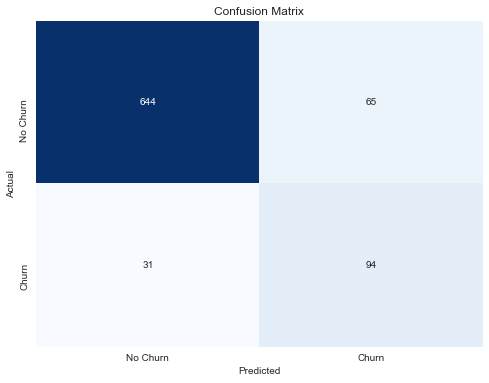

In [27]:
#Decision Tree 

#create the decision tree
clf = DecisionTreeClassifier(random_state=42)

#Train the classifier on the training data
clf.fit(resampled_X_train, resampled_y_train)

#Make predicitons on the testing data
y_pred = clf.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")

#Dsiplay the classification report and confusion matrix
print('\nClassfication Report:')
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(cm, index=['No Churn', 'Churn'],columns=['No Churn', 'Churn'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Classification report of Decision Tree in summary:
- The model performs well in predicting 'No Churn' instances, with high precision and recall.
- For 'Churn' predictions, precision is lower, indicating a higher rate of false positives, but recall is still reasonable.
- The model has an overall accuracy of 88%, suggesting good overall performance.

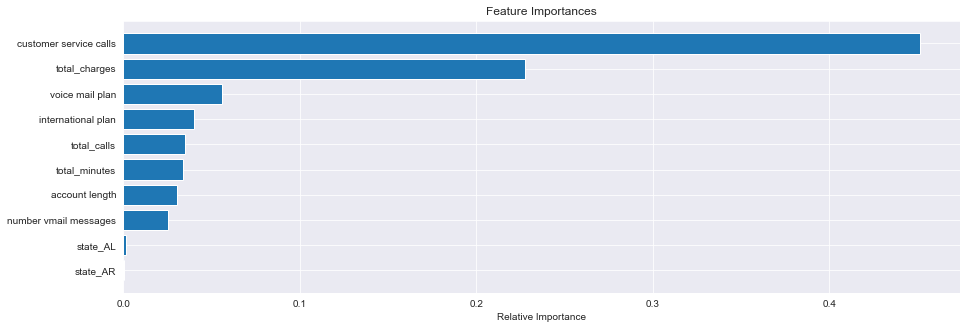

In [28]:
#Feature Importance in the Decision Tree

column_names = list(resampled_X_train.columns)
importances = clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(15,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], align= 'center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


#### 4.4 Random Tree Classifier

In [29]:
#Random forest classifier
#Instantiate the classifier
rf = RandomForestClassifier(random_state=42)
#Fit on the training data
rf.fit(resampled_X_train,resampled_y_train)


RandomForestClassifier(random_state=42)

In [30]:
#predict on the test data
y_pred_rf = rf.predict(X_test)

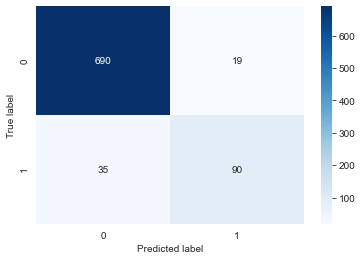

In [31]:
#rf confusion matrix

plot_confusion_matrix(y_test, y_pred_rf,[0,1])

In [32]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       709
         1.0       0.83      0.72      0.77       125

    accuracy                           0.94       834
   macro avg       0.89      0.85      0.87       834
weighted avg       0.93      0.94      0.93       834



Classification report of Random Tree Classsifier in summary:
- The model performs well, with high precision for both classes.
- 'No Churn' instances are well-identified with high recall (97%), and precision is also high (95%).
- For 'Churn' predictions, recall is 72%, indicating that the model identified 72% of the actual 'Churn' instances. Precision for - - -  'Churn' is also high at 83%.
- The overall accuracy is 94%, suggesting good overall performance.

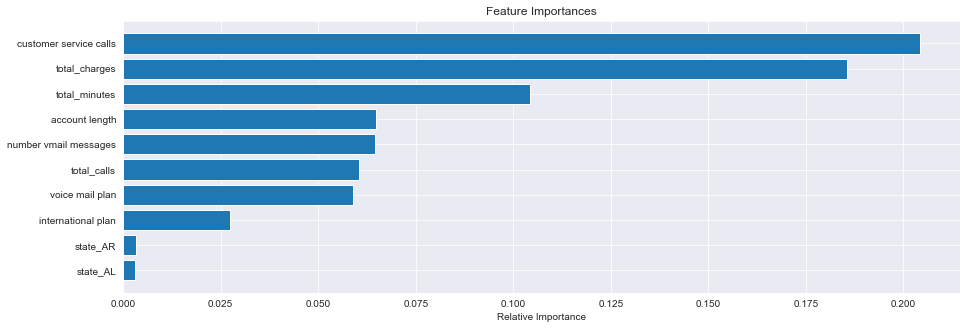

In [33]:
column_names = list(resampled_X_train.columns)
importances = rf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(15,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], align= 'center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# 5. EVALUATION

In this section I will be able to evaluate models on the recall score and ROC_AUC, which in turn I;ll be able to know which model was the best and later tuning it for better perfomance.

##### 5.1 Recall Score
This is a measure of how many positive instances the model correctly indetifies. The higher the recall score the  better the model.

In [34]:
np.random.seed(42)

classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'recall': recall}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

result_table

,recall
classifiers,
LogisticRegression,0.720
DecisionTreeClassifier,0.752
RandomForestClassifier,0.720


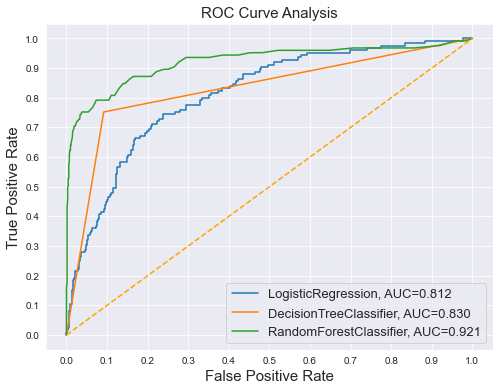

In [35]:
np.random.seed(42)
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

 - The ROC curve shows that the RandomForestClassifier has the best performance among our three models with a score of 0.921 and LogisticRgression with the lowest performance with a score of 0.812.

  - The ROC curve essential show us the trade-off between the (TPR) true positive rate and (FPR) false positive rate for our binary classifiers.

  -  TPR = those positive instances correctly classified as such
  - FPR = those negatives instances incorrectly classifies as positives

#### 5.2 Model Tuning

As seen from out evaluation section the RandomForestClassification hadd the best performance among the three.To improve the perfomance of the model we have to carry out model tuning by use of GridSearch.

In [36]:
#Tuning RandomForestClassification

#Define the grid
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [15, 20, 35],
    "min_samples_split":[5, 10, 15],
    "min_samples_leaf":[2, 4, 10],
    "criterion":['entropy','gini']
}

#Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring="recall", cv=5, n_jobs=-1)
grid_search.fit(resampled_X_train, resampled_y_train)
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_
#Evaluate
y_pred_grid = best_rf_classifier.predict(X_test)
#Display the best parameters
print("Best Parameters:", best_params)

#Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))


Best Parameters: {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       709
         1.0       0.81      0.74      0.78       125

    accuracy                           0.94       834
   macro avg       0.88      0.86      0.87       834
weighted avg       0.93      0.94      0.93       834



classification_report of RandomForestClassifier after tuning:
- The model performs well, with high precision for both classes.
- 'No Churn' instances are well-identified with high recall (97%), and precision is also high (95%).
- For 'Churn' predictions, recall is 72%, indicating that the model identified 72% of the actual 'Churn' instances. This as close as to the 0.8 recall score we needed to make our model effective.
- The model iwth a recall score can be called Pretty Good model.
- Precision for 'Churn' is also high at 83%.
- The overall accuracy is 94%, suggesting good overall performance.

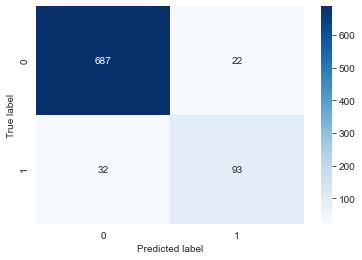

In [37]:
#Confusion matrix
plot_confusion_matrix(y_test, y_pred_grid,[0,1])

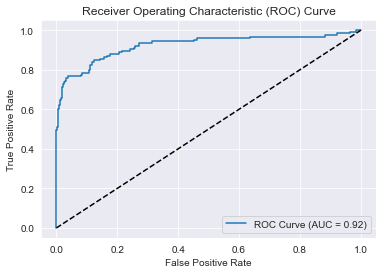

In [38]:
# Get the predicted probabilities for the positive class
y_prob_grid = best_rf_classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_grid)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_prob_grid)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

For 'Churn' predictions, recall is 74% indicating that the model identified 74% of the actual 'Churn' instances. This as close as to the 0.8 recall score we needed to make our model effective.
- The model with this recall score can be called Pretty Good model.

                   Feature  Importance
4   customer service calls    0.218844
5            total_charges    0.204155
7            total_minutes    0.095880
3    number vmail messages    0.082754
2          voice mail plan    0.074110
0           account length    0.047124
6              total_calls    0.045037
1       international plan    0.029042
59           area code_510    0.026658
58           area code_415    0.021068


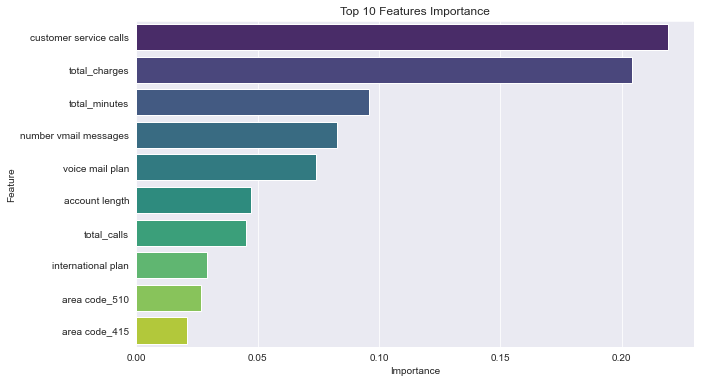

In [50]:
# Assuming you have a tuned RandomForestClassifier stored in `tuned_rf_classifier`

# Get feature importances
feature_importances = best_rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Print or visualize the top 10 features
print(top_features)

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))

# Create a bar plot of the top 10 features
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')

# Add titles and labels
plt.title('Top 10 Features Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.show()


# 6. CONCLUSION

- As our recall score for our model was .74 as good as it is a predictive model, more time is neede for further engineering to help improve this score.


#### 6.1 Reccomendations

For SyriaTel to improve on customer retention they need to deploy the machine learning model to get realtime predicitions.
Realtime continuous monitoring ensure the model is always learning and improving with time. With use of feature importance on can leverage it to provide insight on how to target service improvements and personalize retention efforts.

A few ways into which SyriaTel can reduce Churning rate is by:
- Focusing on retention programss in area code 415 and 510 as these have the highest churning rate.
- Improve on quality customer service call:
- By having responsive customer support.Provide quick and effective customer support. Resolve issues promptly and ensure that customers feel heard and valued.
- Encourage and act upon customer feedback. Use surveys, reviews, and feedback forms to understand customer satisfaction and areas for improvement.
- Competitive Pricing on plans : Regularly review and adjust pricing strategies on different plans to remain competitive in the market. Consider offering flexible pricing plans that cater to different customer needs.